In [59]:
import numpy as np
import pandas as pd
df = pd.read_csv(r'C:\Users\linnn\Desktop\电子资源-零基础学机器学习\第4课 逻辑回归\教学用例1 心脏病\数据集\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
df.target.value_counts()          #輸入某欄位名稱，使用value_counts()方法，可顯示各類別的數目

1    165
0    138
Name: target, dtype: int64

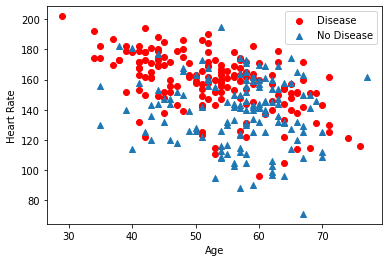

In [61]:
import matplotlib.pyplot as plt

#以年齡+最大心跳作為輸入，查看分類結果散點圖

#有心臟病
plt.scatter(x = df.age[df.target==1],      #設定條件，年齡但要符合target=1(有心臟病)的人，才會納入
           y = df.thalach[df.target==1],c = 'red')

#無心臟病
plt.scatter(x = df.age[df.target==0],
           y = df.thalach[df.target==0],marker='^')

plt.legend(['Disease','No Disease'])
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show()                 #顯示出心跳愈高，患心臟病的可能性就愈大

In [62]:
X = df.drop(['target'],axis=1)          #Dataframe
y = df.target.values    #加.values可將資料型態從series轉成ndarray，因為series無法reshpae()

In [63]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
y = y.reshape(-1,1)

In [65]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [66]:
print('張量X的形狀:',X.shape)
print('張量y的形狀:',y.shape)

張量X的形狀: (303, 13)
張量y的形狀: (303, 1)


In [67]:
from sklearn.model_selection import train_test_split         #將資料作拆分
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [68]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2


In [69]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3


In [70]:
#資料特徵縮放，使資料皆落在[0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#對資料壓縮器進行兩次呼叫
X_train = scaler.fit_transform(X_train)     #先擬和再應用      
X_test = scaler.transform(X_test)       #直接應用

In [71]:
X_train

array([[0.3125    , 1.        , 0.        , ..., 1.        , 0.25      ,
        0.66666667],
       [0.35416667, 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       [0.25      , 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.72916667, 1.        , 0.        , ..., 0.5       , 0.5       ,
        0.33333333],
       [0.79166667, 1.        , 0.        , ..., 0.5       , 0.        ,
        0.66666667],
       [0.54166667, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ]])

In [72]:
X_test

array([[0.625     , 1.        , 1.        , 0.71698113, 0.36986301,
        0.        , 0.        , 0.67175573, 0.        , 0.03571429,
        0.5       , 0.        , 1.        ],
       [0.375     , 1.        , 0.        , 0.1509434 , 0.34018265,
        0.        , 0.        , 0.35877863, 1.        , 0.17857143,
        0.5       , 0.25      , 0.66666667],
       [0.125     , 1.        , 0.        , 0.24528302, 0.16438356,
        0.        , 0.5       , 0.45038168, 1.        , 0.28571429,
        0.5       , 0.        , 1.        ],
       [0.45833333, 0.        , 0.66666667, 0.24528302, 0.38584475,
        0.        , 0.        , 0.65648855, 0.        , 0.10714286,
        1.        , 0.        , 0.66666667],
       [0.27083333, 1.        , 0.66666667, 0.33962264, 0.12328767,
        0.        , 0.5       , 0.60305344, 0.        , 0.        ,
        1.        , 0.        , 0.66666667],
       [0.8125    , 1.        , 0.66666667, 0.81132075, 0.33789954,
        1.        , 0.     

In [73]:
def sigmoid(z):
    y_hat = 1 / (1 + np.exp(-z))      #logistic function
    return y_hat

def loss_function(X,y,w,b):
    y_hat = sigmoid(np.dot(X,w)+b)    #用Sigmoid函數 進行邏輯轉換生成y'
    loss = -((y * np.log(y_hat) + (1-y) * np.log(1-y_hat)))   #計算損失 (預測值到真實值的誤差)
    cost = np.sum(loss) / X.shape[0]         #將所有的樣本誤差取平均值。  X.shape[0]=303 ，matrix.shape[0]表示列數 , 1表示行數
    return cost                       #回傳整個資料集的平均損失

def gradient_descent(X,y,w,b,lr,iter):
    l_history = np.zeros(iter)      #初始化紀錄梯度下降過程中 誤差值(損失)的array
    w_history = np.zeros((iter,w.shape[0],w.shape[1]))       #初始化紀錄梯度下降過程中 weight的array
    b_history = np.zeros(iter)      #初始化紀錄梯度下降過程中 bias的array
    for i in range(iter):
        y_hat = sigmoid(np.dot(X,w) + b )
        loss = -(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))
        derivative_w = np.dot(X.T,(y_hat - y)) / X.shape[0]       #內積
        derivative_b = np.sum(y_hat - y) / X.shape[0]
        w = w - lr * derivative_w
        b = b - lr * derivative_b
        l_history[i] = loss_function(X,y,w,b)        #梯度下降過程中的損失
        print('輪次',i+1,'當前輪訓練集損失:',l_history[i])
        w_history[i] = w              #紀錄梯度下降過程中的權重
        b_history[i] = b              #紀錄梯度下降過程中的偏置
    return l_history,w_history,b_history 

def predict(X,w,b):
    z = np.dot(X,w) + b     #線性函數  z = wX + b
    y_hat = sigmoid(z)      #邏輯函數轉換
    y_pred = np.zeros((y_hat.shape[0],1))    #初始化預測結果變數 
    for i in range(y_hat.shape[0]):
        if y_hat[i,0] < 0.5:
            y_pred[i,0] = 0              #把原先機率值y_hat 轉成 0和1 的分類
        else:
            y_pred[i,0] = 1
    return y_pred           #回傳預測分類的結果

def logistic_regression(X,y,w,b,lr,iter):       #定義邏輯回歸模型
    l_history,w_history,b_history = gradient_descent(X,y,w,b,lr,iter)
    #Gradient descent
    print('訓練最終損失:',l_history[-1])
    y_pred = predict(X,w_history[-1],b_history[-1])       #進行預測。呼叫先前定義的predict()
    training_acc = 100 - np.mean(np.abs(y_pred - y_train)) * 100     #計算準確率
    print('Logistic regression training accuracy: {:.2f}%' .format(training_acc))
    return l_history,w_history,b_history

In [74]:
dimension = X.shape[1]     #行的數目
weight = np.full((dimension,1),0.1)
bias = 0
alpha = 1
iterations = 500      

In [75]:
loss_history,weight_history,bias_history = logistic_regression(X_train,y_train,weight,bias,alpha,iterations)

輪次 1 當前輪訓練集損失: 0.6683132850497477
輪次 2 當前輪訓練集損失: 0.642929711577872
輪次 3 當前輪訓練集損失: 0.620858833664284
輪次 4 當前輪訓練集損失: 0.6015299176167709
輪次 5 當前輪訓練集損失: 0.5845422784900919
輪次 6 當前輪訓練集損失: 0.5695524409335111
輪次 7 當前輪訓練集損失: 0.5562683784138788
輪次 8 當前輪訓練集損失: 0.5444432725380884
輪次 9 當前輪訓練集損失: 0.5338692023213505
輪次 10 當前輪訓練集損失: 0.5243712455591717
輪次 11 當前輪訓練集損失: 0.5158022187719777
輪次 12 當前輪訓練集損失: 0.5080381239553398
輪次 13 當前輪訓練集損失: 0.5009742825267254
輪次 14 當前輪訓練集損失: 0.49452209379317347
輪次 15 當前輪訓練集損失: 0.4886063387889118
輪次 16 當前輪訓練集損失: 0.48316294857712355
輪次 17 當前輪訓練集損失: 0.47813716176868465
輪次 18 當前輪訓練集損失: 0.4734820048130401
輪次 19 當前輪訓練集損失: 0.46915703820427784
輪次 20 當前輪訓練集損失: 0.46512732091170617
輪次 21 當前輪訓練集損失: 0.46136255354639966
輪次 22 當前輪訓練集損失: 0.45783636783749765
輪次 23 當前輪訓練集損失: 0.4545257359286322
輪次 24 當前輪訓練集損失: 0.45141047791848227
輪次 25 當前輪訓練集損失: 0.4484728500955914
輪次 26 當前輪訓練集損失: 0.4456971995953261
輪次 27 當前輪訓練集損失: 0.44306967386480556
輪次 28 當前輪訓練集損失: 0.4405779754723948
輪次 29 當前輪訓練集損失: 0.4382

In [76]:
y_pred = predict(X_test,weight_history[-1],bias_history[-1])
testing_acc = 100 - np.mean(np.abs(y_pred - y_test)) * 100
print('Logistic regression testing accuracy: {:.2f}% '.format(testing_acc))

Logistic regression testing accuracy: 85.25% 


In [77]:
print('Logistic_regression_predict_value:',predict(X_test,weight_history[-1],bias_history[-1]))

Logistic_regression_predict_value: [[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


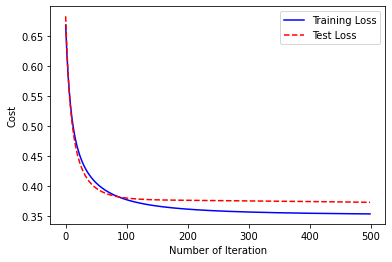

In [78]:
#繪製損失曲線
loss_history_test = np.zeros(iterations)
for i in range(iterations):
    loss_history_test[i] = loss_function(X_test,y_test,weight_history[i],bias_history[i])
index = np.arange(0,iterations,1)
plt.plot(index,loss_history,c='blue',linestyle = 'solid')
plt.plot(index,loss_history_test,c='red',linestyle = 'dashed')
plt.legend(['Training Loss','Test Loss'])
plt.xlabel('Number of Iteration')
plt.ylabel('Cost')
plt.show()

In [79]:
#跟上面作法類似，直接使用人家寫好的model，
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)   #fit直接包含了gradient descent
print('Logistic regression testing accuracy: {:.2f}% '.format(lr.score(X_test,y_test)*100))

Logistic regression testing accuracy: 86.89% 


C:\Users\linnn\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
#利用dummy variable解決 各類別裡面的資料關係，有些欄位裡面編號0,1,2,3.. 並非代表大小關係，而是有各自含意，把他們拉出來，變成各別ㄉ欄位

In [81]:
a = pd.get_dummies(df['cp'],prefix = 'cp')
b = pd.get_dummies(df['thal'],prefix = 'thal')
c = pd.get_dummies(df['slope'],prefix = 'slope')

frames = [df,a,b,c]
df = pd.concat(frames,axis = 1)
df = df.drop(columns = ['cp','thal','slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [82]:
#準確率提高
y_pred = predict(X_test,weight_history[-1],bias_history[-1])
testing_acc = 100 - np.mean(np.abs(y_pred - y_test)) * 100
print('Logistic regression testing accuracy: {:.2f}% '.format(testing_acc))

Logistic regression testing accuracy: 85.25% 
